## Initializing and imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from __future__ import print_function, division
!pip install pytorch_lightning &> /dev/null


from torchvision.utils import draw_bounding_boxes
import os
import copy
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torchvision import transforms, utils
from  matplotlib.patches import Rectangle as rec
import numpy as np
import h5py
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from scipy import ndimage
import torch.nn.functional as F

import torch.nn as nn
import pytorch_lightning as pl
import pytorch_lightning.loggers as pl_loggers
import pytorch_lightning.callbacks as pl_callbacks

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
seed = 17
torch.manual_seed(seed);

In [60]:
from dataset_v1 import *
from utils import *
from rpn_v1 import *

from multiprocessing.connection import wait
import torch
from torch.nn import functional as F
from torchvision import transforms
from torch import nn, Tensor
import matplotlib.pyplot as plt
import torchvision
from scipy import stats as st


from torch.utils.data import Dataset, DataLoader
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Defining file path and building Dataset

In [8]:
# file path and make a list
imgs_path   = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_img_comp_zlib.h5'
masks_path  = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_mask_comp_zlib.h5'
labels_path = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_labels_comp_zlib.npy'
bboxes_path = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_bboxes_comp_zlib.npy'
paths = [imgs_path, masks_path, labels_path, bboxes_path]
# load the data into data.Dataset
dataset = BuildDataset(paths)

# build the dataloader
# set 20% of the dataset as the training data
full_size = len(dataset)
train_size = int(full_size * 0.8)
test_size = full_size - train_size
# random split the dataset into training and testset

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
rpn_net = RPNHead()
# push the randomized training data into the dataloader

# train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
# test_loader  = DataLoader(test_dataset, batch_size=2, shuffle=False, num_workers=0)
batch_size = 4
train_build_loader = BuildDataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
train_loader = train_build_loader.loader()
test_build_loader = BuildDataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = test_build_loader.loader()

## Training the Model

In [10]:
from pytorch_lightning.callbacks import ModelCheckpoint
val_checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="./training_data_new_model_2",
    filename="val_loss{epoch:02d}-{val_loss:.2f}",
    save_top_k=3,
    mode="min",
)
train_checkpoint_callback = ModelCheckpoint(
    monitor="train_loss",
    dirpath="./training_data_new_model_2",
    filename="train_loss{epoch:02d}-{train_loss:.2f}",
    save_top_k=3,
    mode="min",
)
# model = 
tb_logger = pl_loggers.TensorBoardLogger("logs2/")
trainer = pl.Trainer(gpus=1,logger=tb_logger, max_epochs=40,callbacks=[val_checkpoint_callback,train_checkpoint_callback])
trainer.fit(rpn_net,train_loader,test_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                     | Type       | Params
--------------------------------------------------------
0 | backbone                 | Sequential | 1.1 M 
1 | intermediate_layer       | Seq

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:229: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/content/rpn_3.py:323: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  row          = invalid // 68
/content/rpn_3.py:330: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'tr

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs2/lightning_logs/ # TODO1 : what is the x axis here ? in the tensorboard

In [11]:
torch.save(rpn_net.state_dict(), 'rpn_2.pth')
np.save('train_losses_rpn2.npy', rpn_net.train_losses)
np.save('val_losses_rpn2.npy', rpn_net.val_losses)

## Historgram Plot

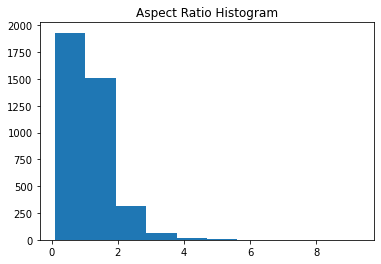

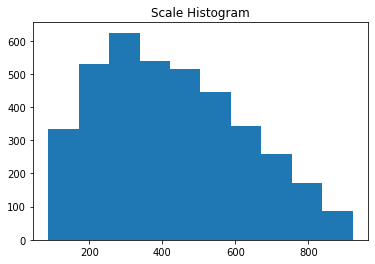

([425.4656465848386, 1.1554366027804388],
 [404.3293045408205, 1.0111759884745717],
 [792.8099992678804, 1.0006253908692935])

In [61]:
histogram(bboxes_path)

We chose the mode values from the scale and aspect ratio being 256 and 0.8 respectively

## Images that show the positive anchors and the corresponding ground truth boxes

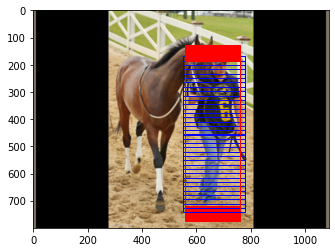

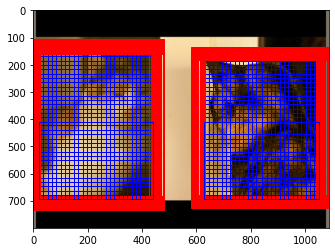

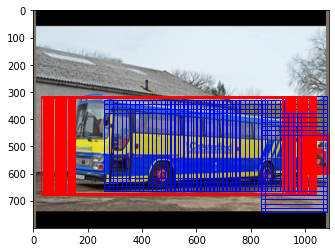

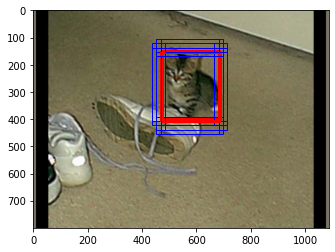

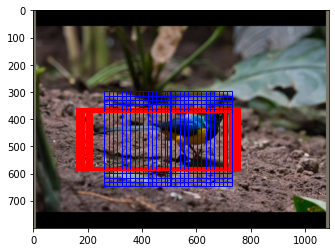

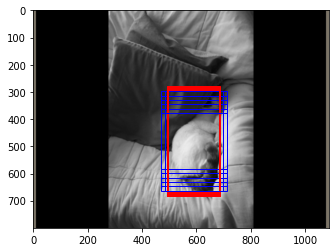

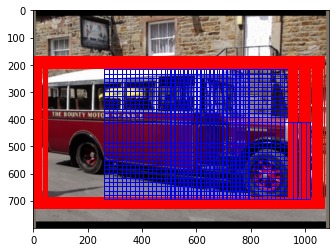

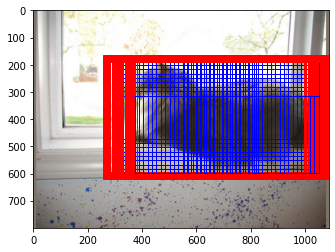

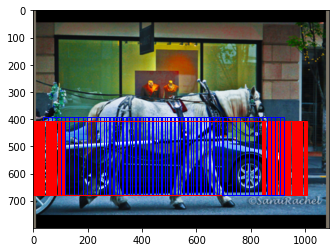

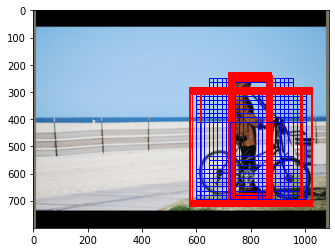

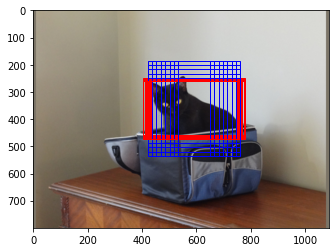

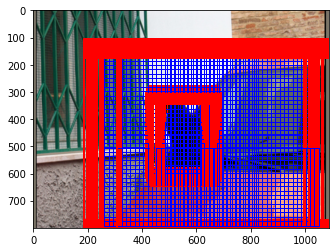

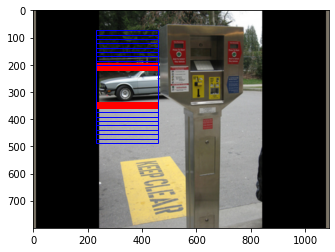

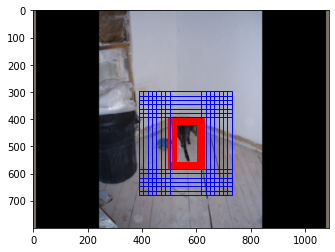

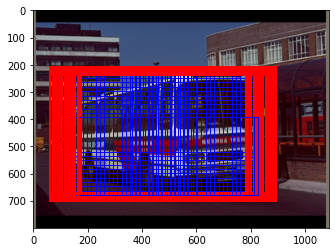

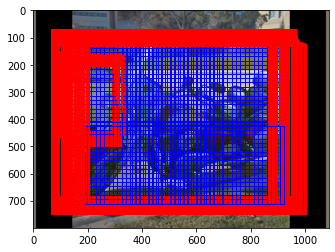

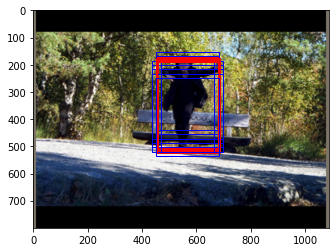

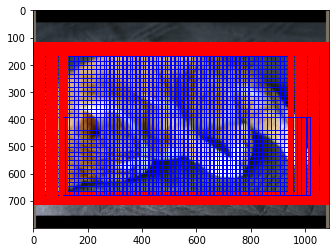

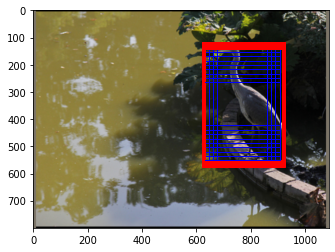

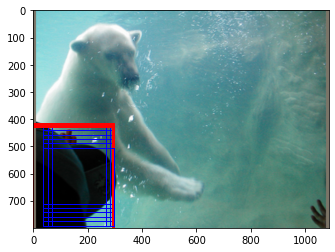

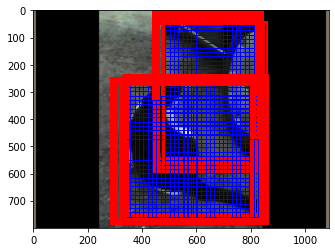

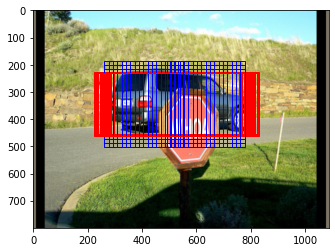

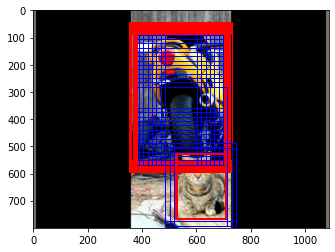

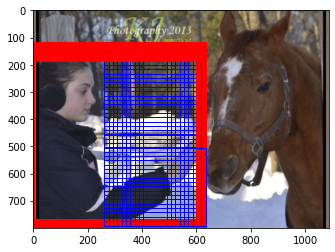

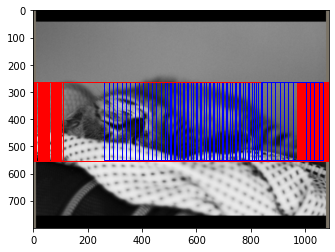

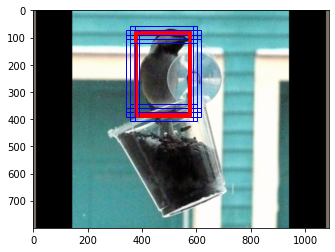

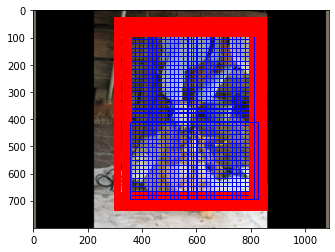

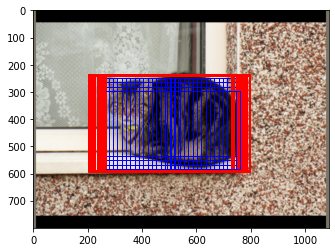

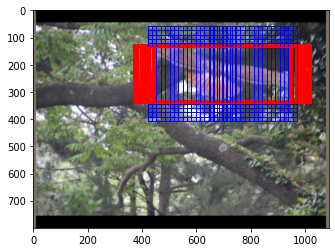

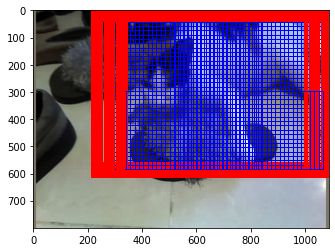

KeyboardInterrupt: ignored

In [52]:
def positive_anchors_gt_boxes():
  batch_size = 1
  train_build_loader = BuildDataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
  train_loader = train_build_loader.loader()
  test_build_loader = BuildDataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
  test_loader = test_build_loader.loader()

  for i,batch in enumerate(train_loader,0):
    for idx in range(len(images)):
        images = batch['images']
        images = torch.stack(images[:])
        indexes= batch['index']
        boxes  = batch['bbox']

        # anchors = rpn_net.create_anchors(rpn_net.anchors_param["ratio"], rpn_net.anchors_param["scale"], rpn_net.anchors_param["grid_size"], rpn_net.anchors_param["stride"])
        gt,ground_coord = rpn_net.create_batch_truth(boxes, indexes, (800,1088))

        # Flatten the ground truth and the anchors
        flatten_coord,flatten_gt,flatten_anchors=output_flattening(ground_coord.unsqueeze(0),gt.unsqueeze(0),rpn_net.anchors)
        
        # Decode the ground truth box to get the upper left and lower right corners of the ground truth boxes
        decoded_coord=output_decoding(flatten_coord,flatten_anchors)
        
        # Plot the image and the anchor boxes with the positive labels and their corresponding ground truth box
        images = transforms.functional.normalize(images,
                                                        [-0.485/0.229, -0.456/0.224, -0.406/0.225],
                                                        [1/0.229, 1/0.224, 1/0.225], inplace=False)
        fig,ax=plt.subplots(1,1)
        ax.imshow(images[0].permute(1,2,0))
        
        find_cor=(flatten_gt==1).nonzero()
        find_neg=(flatten_gt==-1).nonzero()
                
        for elem in find_cor:
            coord=decoded_coord[elem,:].view(-1)
            anchor=flatten_anchors[elem,:].view(-1)

            col='r'
            rect=patches.Rectangle((coord[0],coord[1]),coord[2]-coord[0],coord[3]-coord[1],fill=False,color=col)
            ax.add_patch(rect)
            rect=patches.Rectangle((anchor[0]-anchor[2]/2,anchor[1]-anchor[3]/2),anchor[2],anchor[3],fill=False,color='b')
            ax.add_patch(rect)

        plt.show()
        
        if(i < 10):
            break
    

## Training and Validation curves that show the total loss, the loss of the classifier and the loss of the regressor. 

In [20]:
def loss_curves():
  t_loss = []
  t_cat_loss = []
  t_reg_loss = []
  for idx in range(len(rpn_net.train_losses)):
    t_loss.append(rpn_net.train_losses[idx][0])
    t_cat_loss.append(rpn_net.train_losses[idx][1])
    t_reg_loss.append(rpn_net.train_losses[idx][2])

  plt.plot(t_loss)
  plt.title("Train Loss")
  plt.show()
  plt.plot(t_cat_loss)
  plt.title("Train Classifier Loss")
  plt.show()
  plt.plot(t_reg_loss)
  plt.title("Train Regressor Loss")
  plt.show()

  v_loss = []
  v_cat_loss = []
  v_reg_loss = []
  for idx in range(len(rpn_net.val_losses)):
    v_loss.append(rpn_net.val_losses[idx][0])
    v_cat_loss.append(rpn_net.val_losses[idx][1])
    v_reg_loss.append(rpn_net.val_losses[idx][2])

  plt.plot(v_loss)
  plt.xlabel('Epochs')
  plt.ylabel('Epochs')
  plt.title("Test Loss")
  plt.show()
  plt.plot(v_cat_loss)
  plt.title("Test Classifier Loss")
  plt.show()
  plt.plot(v_reg_loss)
  plt.title("Test Regressor Loss")
  plt.show()

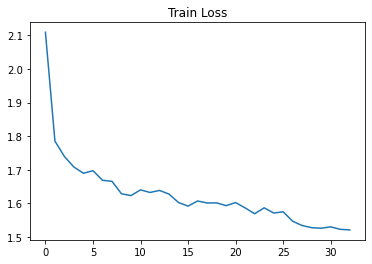

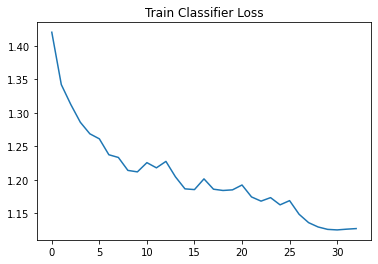

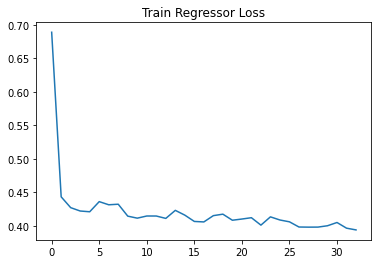

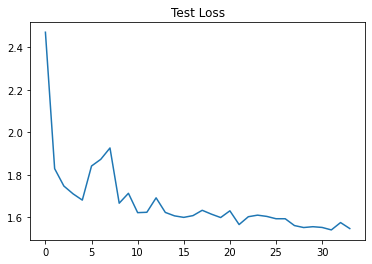

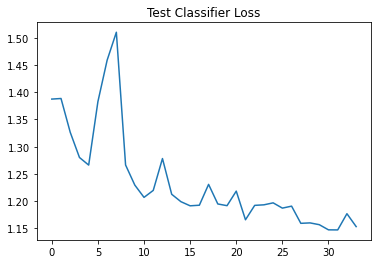

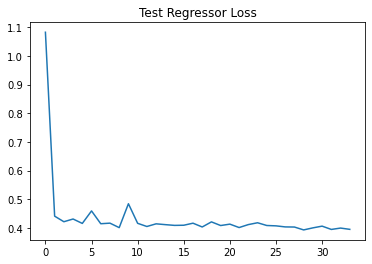

In [22]:
loss_curves()

## 5. Report of the point-wise accuracy of the proposal classifier. Plots of the top 20 proposals for some images of the test set.

In [81]:
def accuracy_value():
  for i,batch in enumerate(test_loader,0):
      images = batch['images']
      images = torch.stack(images[:])
      indexes= batch['index']
      boxes  = batch['bbox']

      gt,ground_coord     = rpn_net.create_batch_truth(boxes, indexes, (800,1088))
      logits, bbox_regs   = rpn_net.forward(images.to(device))

      indexes = torch.where(gt == 1)
      num = torch.sum(logits[indexes])
      accuracy = num/len(indexes[0])

      # if i == 10:
      print(accuracy)
      if i == 2:
        break

In [82]:
accuracy_value()

tensor(0.6098, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.7384, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.6123, device='cuda:0', grad_fn=<DivBackward0>)


In [65]:
def point_wise_proposal():
  for i,batch in enumerate(test_loader,0):
      images = batch['images']
      images = torch.stack(images[:])
    
      logits, bbox_regs = rpn_net.forward(images.to(device))
      scores_sorted_list, pre_nms_matrix_list, nms_clas_list, nms_prebox_list = rpn_net.postprocess(logits.detach().cpu(), bbox_regs.detach().cpu(), IOU_thresh = 0.5 ,keep_num_preNMS = 20, keep_num_postNMS = 10)

      plot_bounding_box(images[0].permute(1,2,0), pre_nms_matrix_list[0].detach().cpu().numpy())
      # plt.title("Top 20 proposals of Test Images")
      plt.show()

      if i == 5:
          break

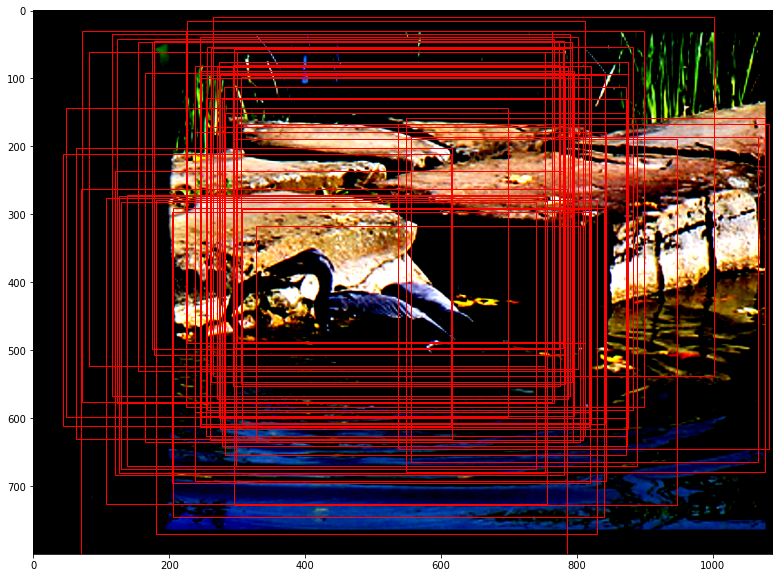

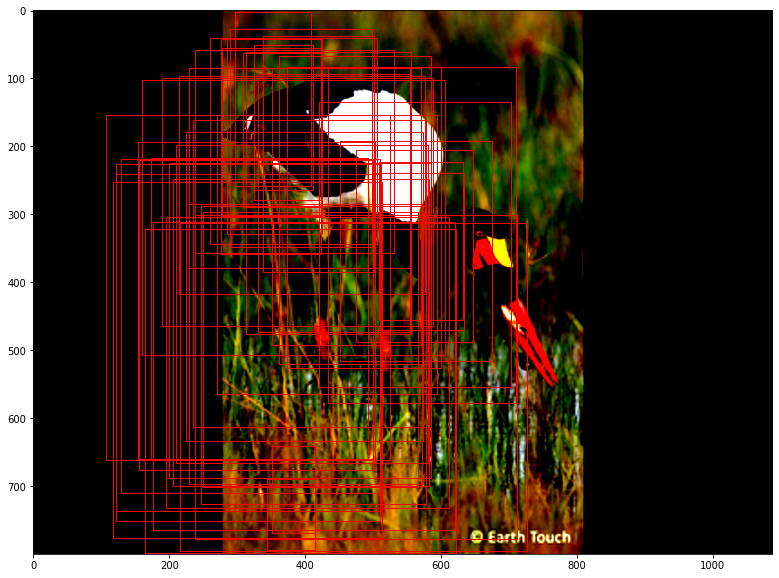

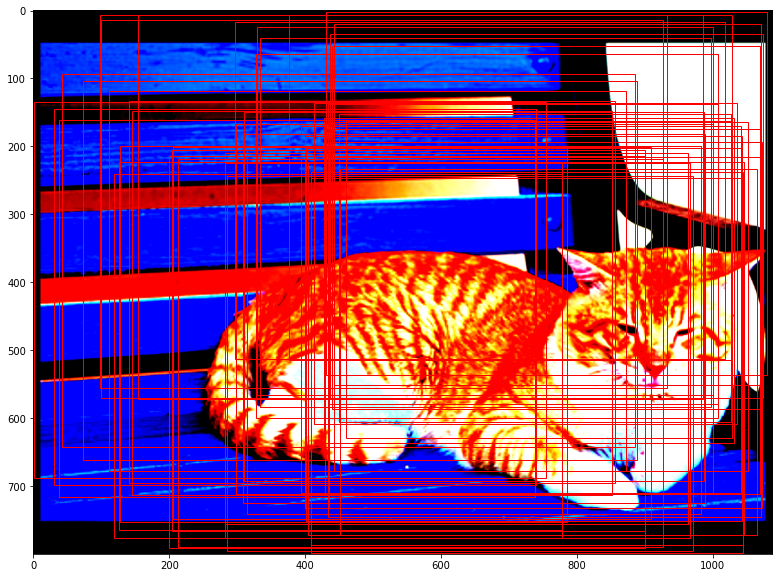

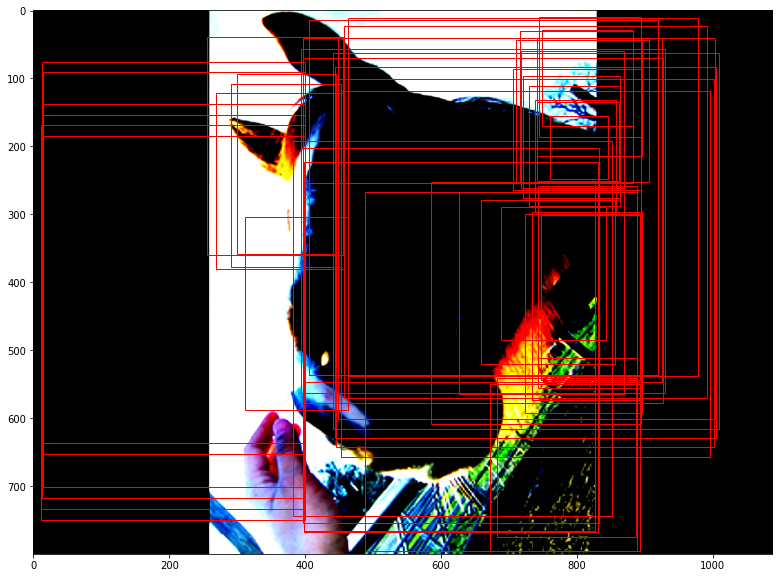

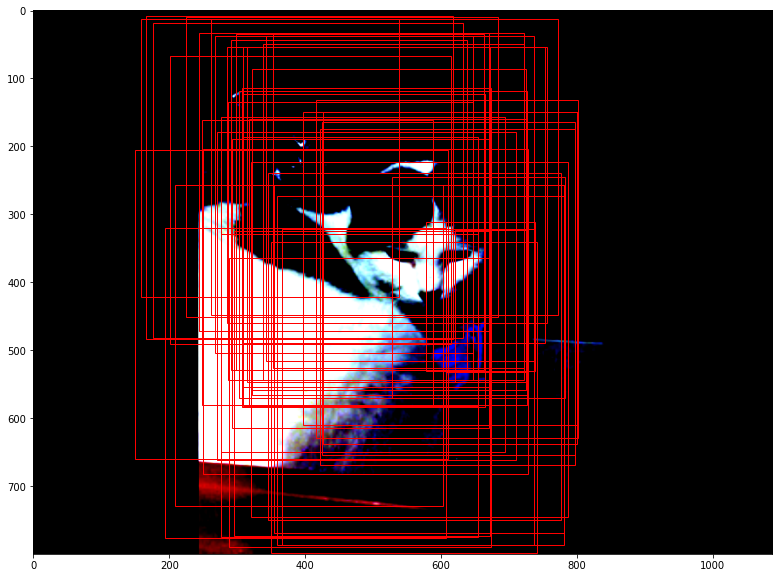

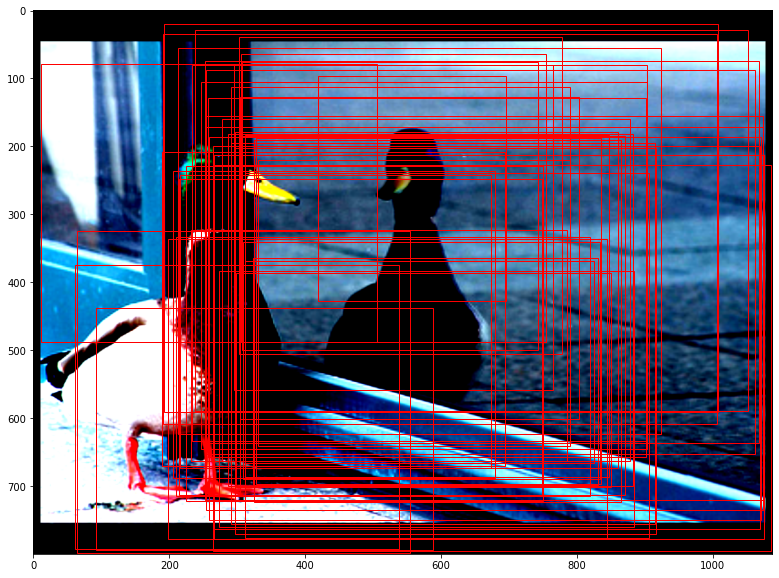

In [66]:
point_wise_proposal()

## Visualization of the proposed boxes before and after the NMS 
Post Training Results

In [71]:
def preposrnms():
  for i,batch in enumerate(train_loader,0):
      images = batch['images']
      images = torch.stack(images[:])
    
      logits, bbox_regs = rpn_net.forward(images.to(device))
      scores_sorted_list, pre_nms_matrix_list, nms_clas_list, nms_prebox_list = rpn_net.postprocess(logits.detach().cpu(), bbox_regs.detach().cpu(), IOU_thresh = 0.5 ,keep_num_preNMS = 20, keep_num_postNMS = 10)

      plot_bounding_box(images[0].permute(1,2,0), pre_nms_matrix_list[0].detach().cpu().numpy())
      plot_bounding_box(images[0].permute(1,2,0), nms_prebox_list[0].detach().cpu().numpy())

      if i == 5:
          break

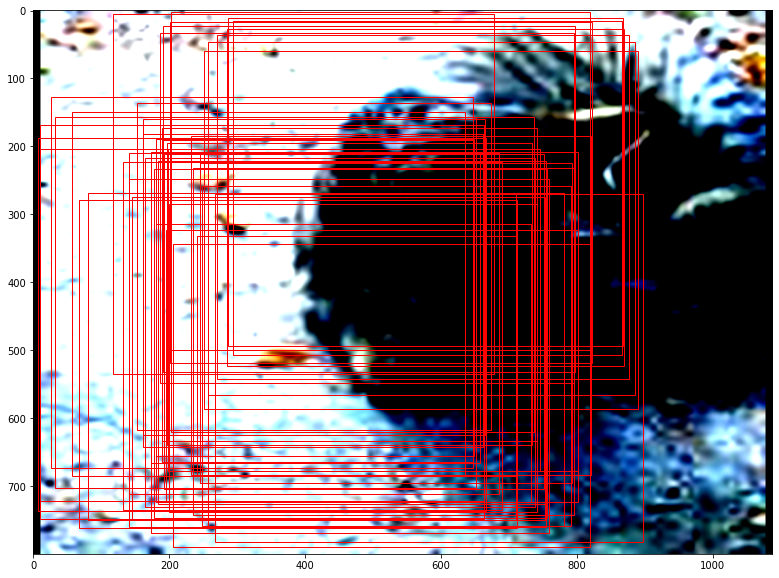

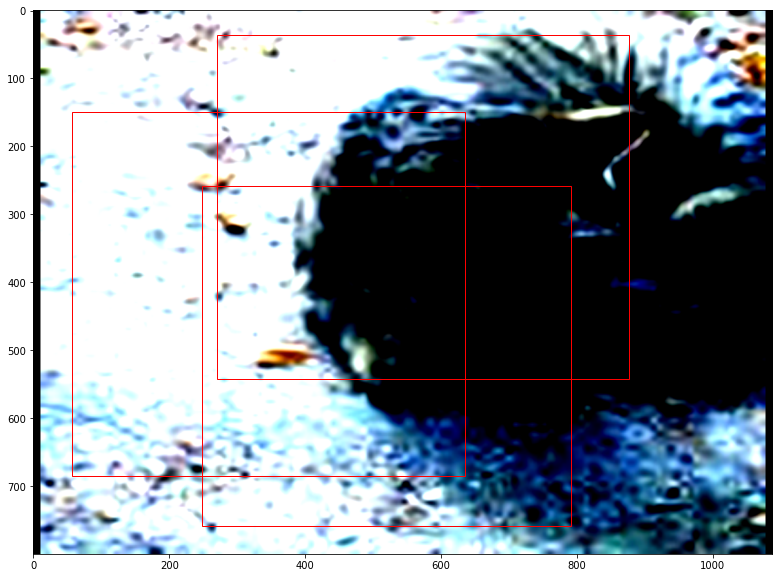

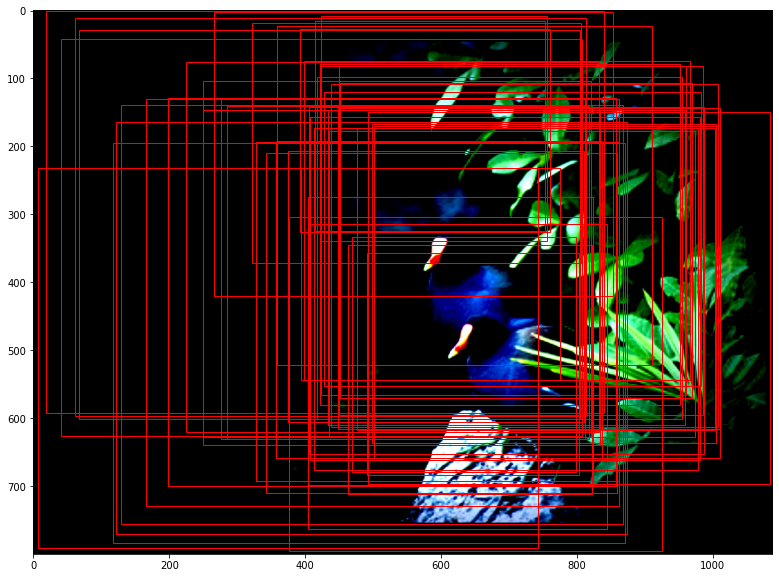

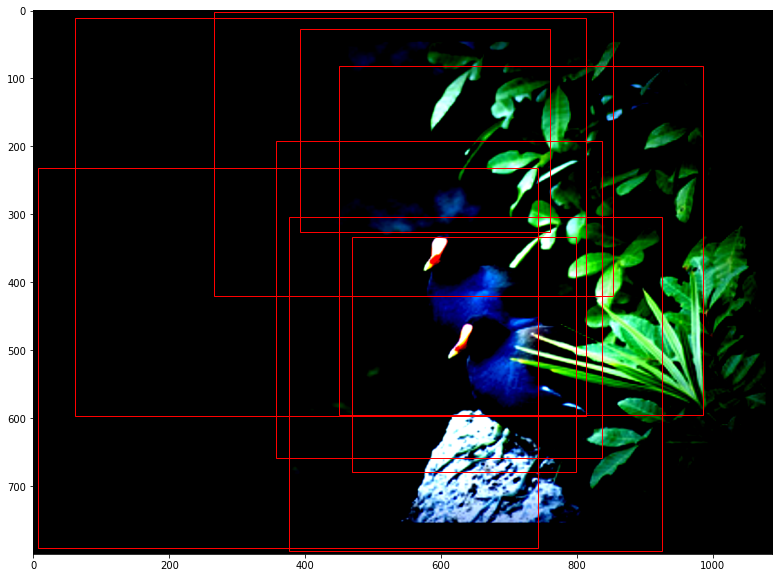

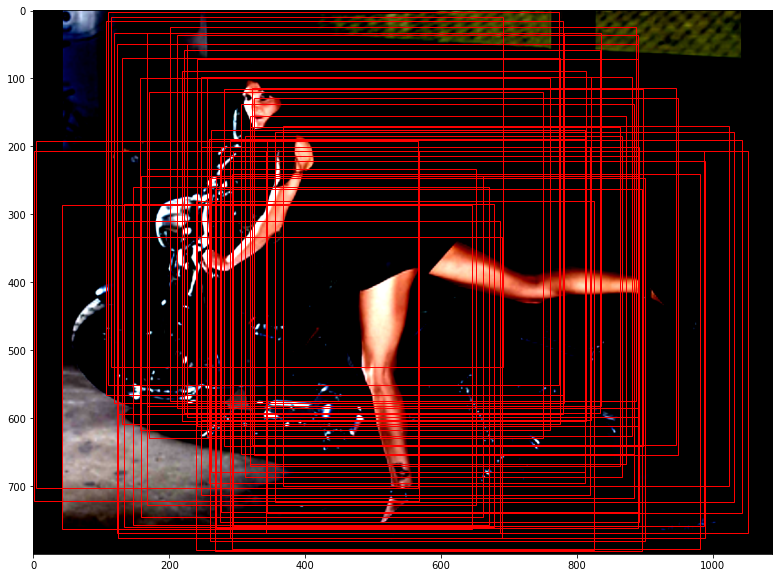

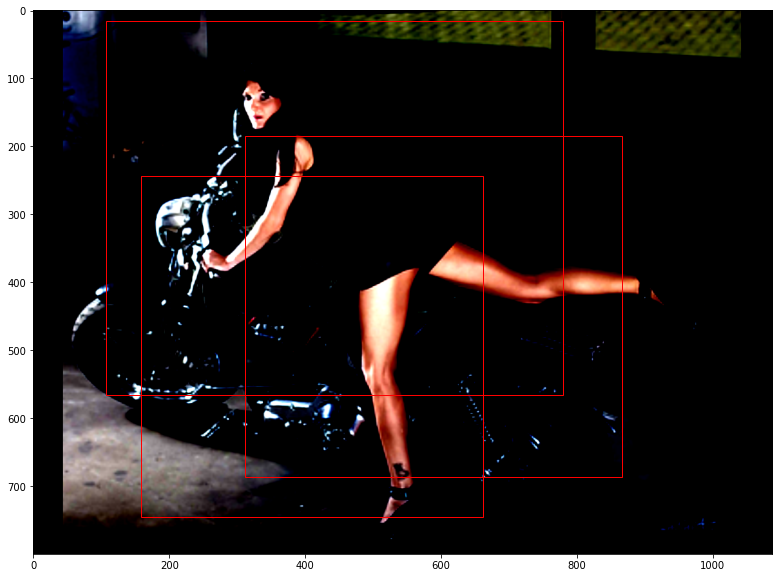

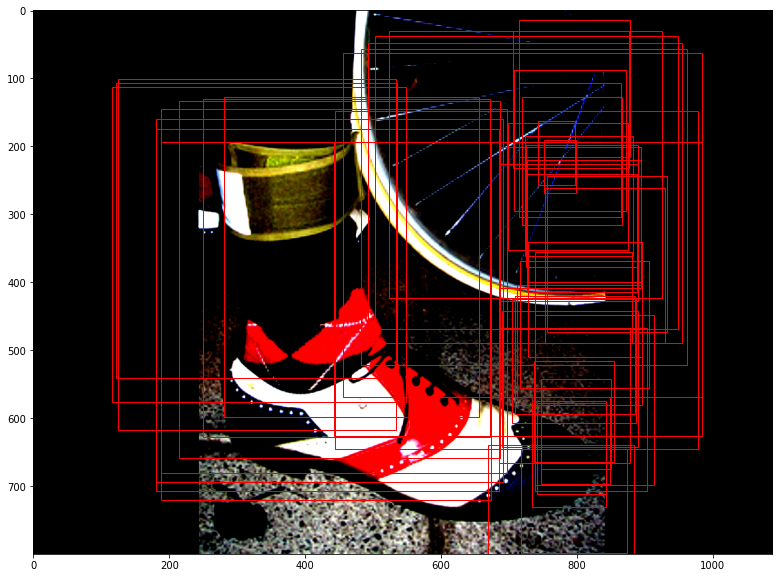

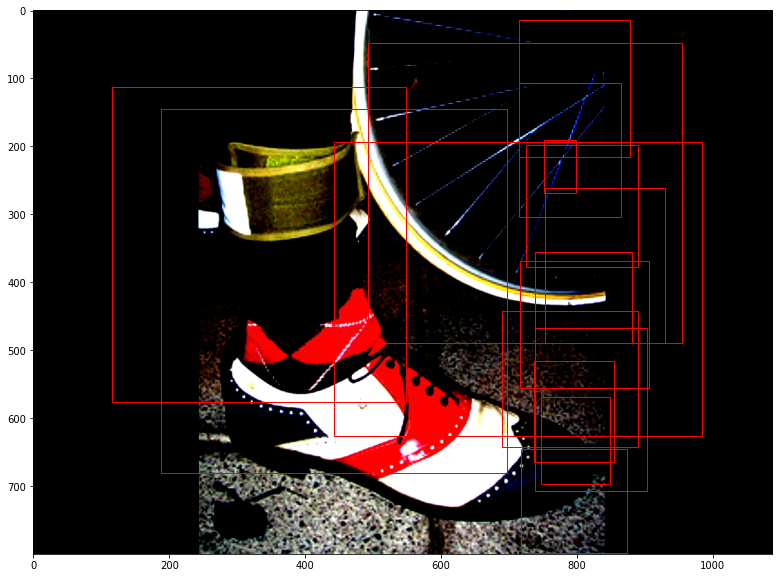

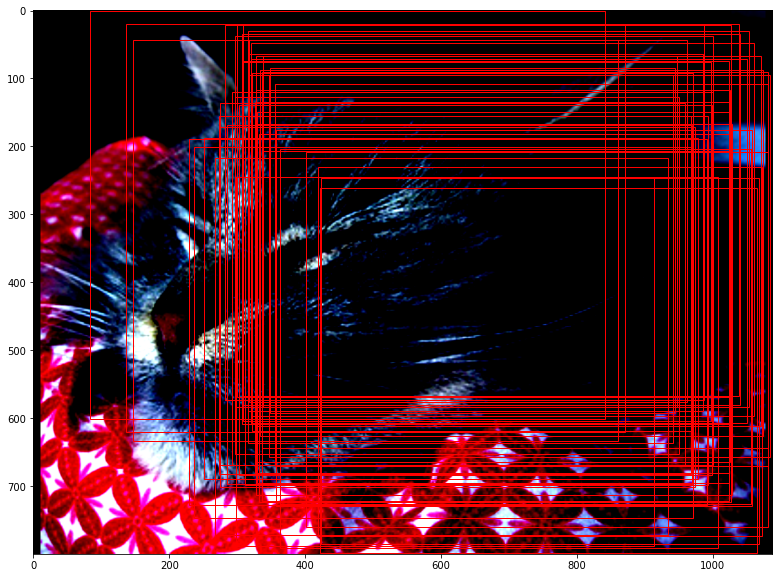

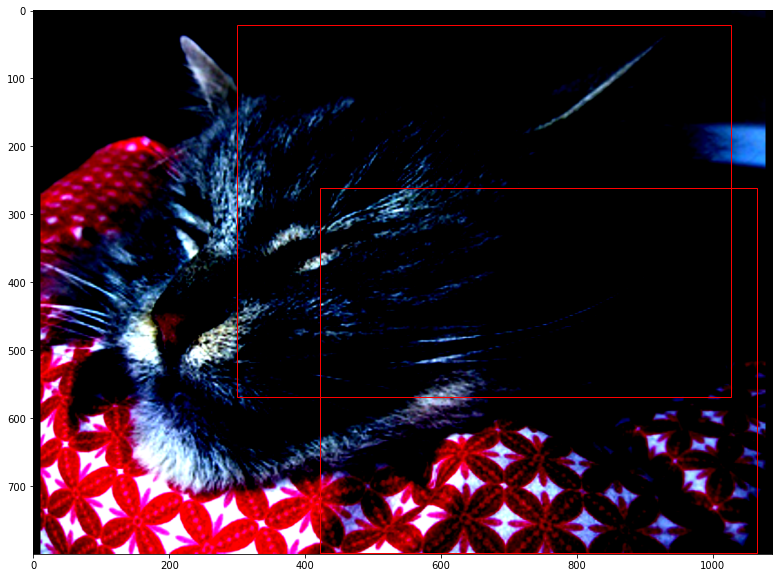

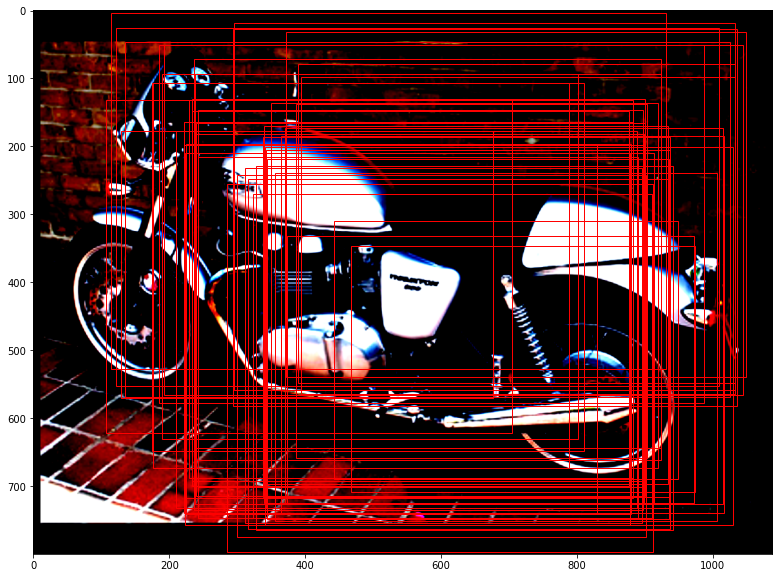

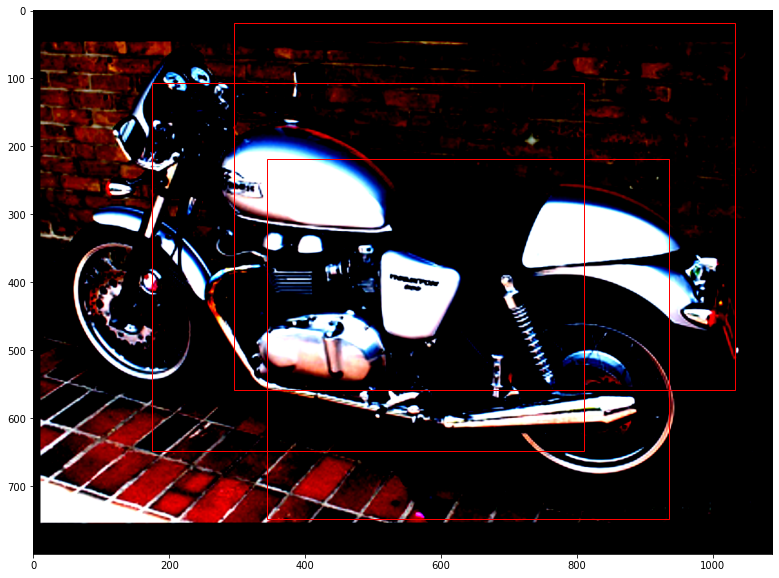

In [72]:
preposrnms()

## CELL TO RUN, FOR YOUR PERUSAL

In [ ]:
# file path and make a list
#########################PLEASE CHANGE THE FILE PATH #####################################################3
imgs_path   = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_img_comp_zlib.h5'
masks_path  = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_mask_comp_zlib.h5'
labels_path = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_labels_comp_zlib.npy'
bboxes_path = '/content/drive/MyDrive/UPENN/SEM 3/CIS680/HW3/hw3_mycocodata_bboxes_comp_zlib.npy'
paths = [imgs_path, masks_path, labels_path, bboxes_path]
# load the data into data.Dataset
dataset = BuildDataset(paths)

# build the dataloader
# set 20% of the dataset as the training data
full_size = len(dataset)
train_size = int(full_size * 0.8)
test_size = full_size - train_size
# random split the dataset into training and testset

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
rpn_net = RPNHead()
# push the randomized training data into the dataloader

# train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
# test_loader  = DataLoader(test_dataset, batch_size=2, shuffle=False, num_workers=0)
batch_size = 4
train_build_loader = BuildDataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
train_loader = train_build_loader.loader()
test_build_loader = BuildDataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = test_build_loader.loader()

#Model Checkpoints
val_checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="./training_data_new_model_2",
    filename="val_loss{epoch:02d}-{val_loss:.2f}",
    save_top_k=3,
    mode="min",
)
train_checkpoint_callback = ModelCheckpoint(
    monitor="train_loss",
    dirpath="./training_data_new_model_2",
    filename="train_loss{epoch:02d}-{train_loss:.2f}",
    save_top_k=3,
    mode="min",
)

#Train
tb_logger = pl_loggers.TensorBoardLogger("logs2/")
trainer = pl.Trainer(gpus=1,logger=tb_logger, max_epochs=40,callbacks=[val_checkpoint_callback,train_checkpoint_callback])
trainer.fit(rpn_net,train_loader,test_loader)

################################################################################################################################################################################################################################################

# HISTOGRAM O/P
histogram(bboxes_path)

############################################################################################################################################################################################################################

#Positive anchors and Ground truth boxes
positive_anchors_gt_boxes()

############################################################################################################################################################################################################################

# LOSS CURVES
loss_curves()

########################################################################################################################################################################################################################################################################################

#Report of the point-wise accuracy of the proposal classifier.
point_wise_proposal()

########################################################################################################################################################################################################

# PRE AND POST NMS
preposrnms()